In [ ]:
### simple regression problem ###

In [5]:
import numpy as np
import matplotlib.pyplot as plt

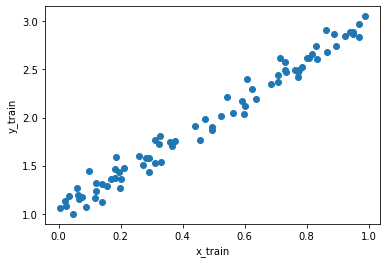

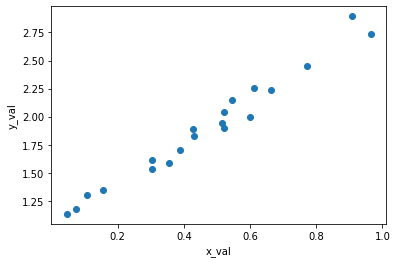

In [7]:
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2*x + .1*np.random.randn(100, 1)

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.scatter(x_train, y_train)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

plt.scatter(x_val, y_val)
plt.xlabel("x_val")
plt.ylabel("y_val")
plt.show()

In [ ]:
### gradient descent ###
# step1: compute the mean square error
# step2: compute the gradients
# step3: update parameters

In [14]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print("initialize a and b")
print(a, b)

lr = 1e-1
n_epochs = 1000

for epoch in range(n_epochs):
    y_hat = a + b * x_train
    error = y_train - y_hat
    loss = (error ** 2).mean()
    
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    a = a - lr * a_grad
    b = b - lr * b_grad

print("after training...")
print(a, b)


print("intercept and coef from sklearn")
from sklearn import linear_model
linr = linear_model.LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_)

initialize a and b
[0.49671415] [-0.1382643]
after training...
[1.02354094] [1.96896411]
intercept and coef from sklearn
[1.02354075] [[1.96896447]]


In [ ]:
### initialize parameters ###

In [15]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [23]:
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

a = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)

a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-0.0029], requires_grad=True) tensor([0.3914], requires_grad=True)
tensor([0.8607], requires_grad=True) tensor([-1.9011], requires_grad=True)
tensor([0.9259], requires_grad=True) tensor([-0.6022], requires_grad=True)


In [25]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [ ]:
### autograd ###

In [27]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

for epoch in range(n_epochs):
    y_hat = a + b * x_train_tensor
    error = y_train_tensor - y_hat
    loss = (error ** 2).mean()

    loss.backward()
    #print(a.grad)
    #print(b.grad)
        
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)
